## Data Understanding

From Kaggle:
"When you’ve been devastated by a serious car accident, your focus is on the things that matter the most: family, friends, and other loved ones. Pushing paper with your insurance agent is the last place you want your time or mental energy spent. This is why Allstate, a personal insurer in the United States, is continually seeking fresh ideas to improve their claims service for the over 16 million households they protect.

Allstate is currently developing automated methods of predicting the cost, and hence severity, of claims. In this recruitment challenge, Kagglers are invited to show off their creativity and flex their technical chops by creating an algorithm which accurately predicts claims severity. Aspiring competitors will demonstrate insight into better ways to predict claims severity for the chance to be part of Allstate’s efforts to ensure a worry-free customer experience."

In [1]:
# Import required modules
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib as plt

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# Data

In [3]:
#import training data set
train = pd.read_csv("../data/raw/train.csv.zip", compression="zip", index_col='id')

### Metadata

In [124]:
# Gather metadata
def get_metadata(df):
    names = []
    unique_cats = []
    missing_vals = []
    val_dtype = []
    for c in df.columns:
        names = np.append(names, c)
        unique_cats = np.append(unique_cats, (len(df[c].unique())))
        missing_vals = np.append(missing_vals, df[c].isnull().sum())
        val_dtype = np.append(val_dtype, df[c].dtype)

    meta_data = pd.DataFrame({'Variable':names, 
                              'Unique':unique_cats.astype(int), 
                              'Num Missing':missing_vals.astype(int),
                              'Data Type':val_dtype
                             })
    return meta_data

meta_data = get_metadata(train)
meta_data.to_csv("../references/training_metadata.csv", index=False)

#### Data Types

Categorical variables will be assumed nominal

In [36]:
meta_data

,Data Type,Num Missing,Unique,Variable
0,object,0,2,cat1
1,object,0,2,cat2
2,object,0,2,cat3
3,object,0,2,cat4
4,object,0,2,cat5
5,object,0,2,cat6
6,object,0,2,cat7
7,object,0,2,cat8
8,object,0,2,cat9
9,object,0,2,cat10


In [123]:
response_name = 'loss'
cat_names = meta_data[meta_data['Data Type']=='object']['Variable']
cont_names = meta_data[(meta_data['Data Type']=='float64') & 
                       (meta_data['Variable']!='loss')]['Variable']

print("There are %.f categorical variables." % len(cat_names))
print("There are %.f continuous variables." % len(cont_names))

print("%.f categorical variables are binary." % len(meta_data[(meta_data['Data Type']=='object') & 
                                                              (meta_data['Unique'] == 2)]['Variable']))

print("%.f categorical variables have high cardinality with more than 50." % \
      len(meta_data[(meta_data['Data Type']=='object') & (meta_data['Unique'] > 50)]['Variable']))

There are 116 categorical variables.
There are 14 continuous variables.
72 categorical variables are binary.
5 categorical variables have high cardinality with more than 50.


#### Pandas-profiling module creates a report to identify variable characteristics. This is output as a separate html file for cleaner consumption. located in the report folder of this project

Characteristics identified:
* Continueous variables 'cont11' and 'cont12' are highly correlated with r=.99 (Chart below). Will exclude one.
* Continueous variables 'cont1' and 'cont9' are highly correlated with r=.93 (Chart below). May exclude one.

In [6]:
train_profile = pandas_profiling.ProfileReport(train)
rejected_variables = train_profile.get_rejected_variables(threshold=0.9)
train_profile.to_file(outputfile="../reports/myoutputfile.html")

---
## Review of target variable 'loss'

'loss' is highly skewed

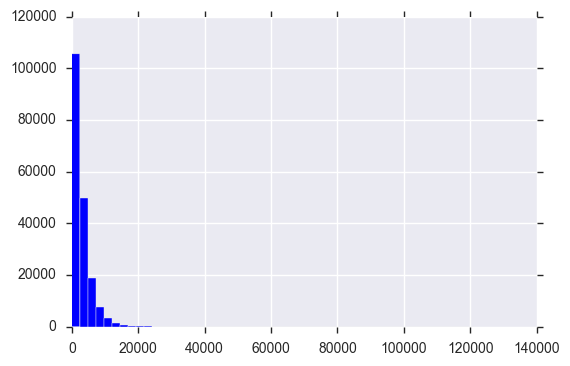

In [66]:
train['loss'].hist(bins=50)

Taking the natural log appears to normalize the target nicely. Almost too nicely...

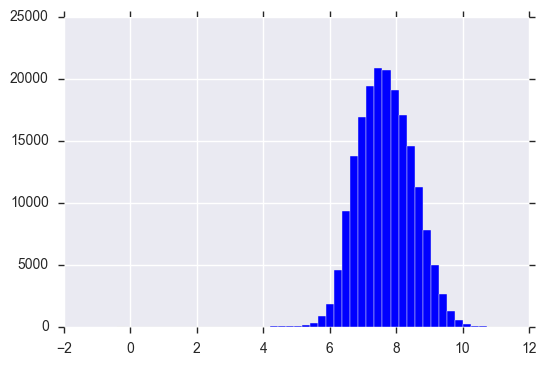

In [65]:
np.log(train['loss']).hist(bins=50)

---
## 'cont13' looks multimodal

Categorizing arbitrarily at .5

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000020B76128>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000021C0A0F0>], dtype=object)

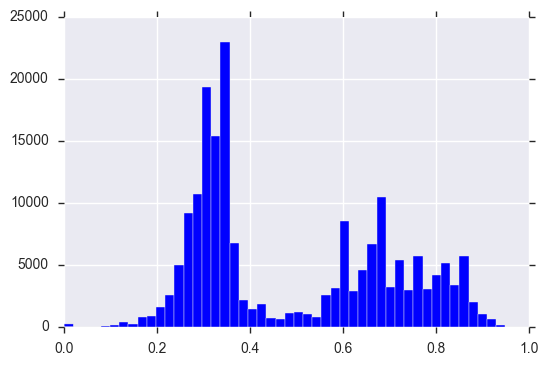

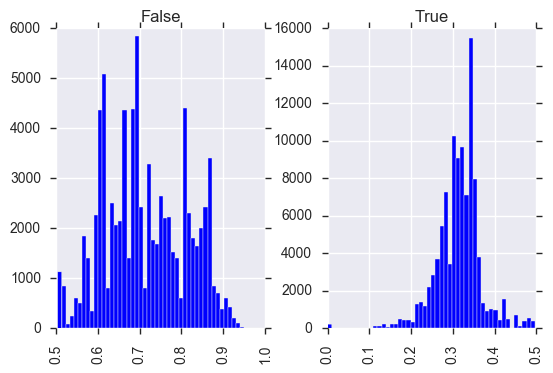

In [77]:
cont13a = train['cont13'] < .5
train['cont13'].hist(bins=50)
train['cont13'].hist(bins=50, by=cont13a)


#### Appears synthsizing a binary categorical variable has not correlation to the other binary categoricals so it will be added.

In [122]:
import category_encoders as ce
encoder = ce.BinaryEncoder()

binary_vars = encoder.fit_transform(train[meta_data[meta_data['Unique']==2]['Variable']])
binary_vars['cont13_Split'] = train['cont13'] < .5 

binary_vars_corr = pd.DataFrame(binary_vars.corr().abs().unstack()).reset_index().sort_values(by=0,kind="quicksort", ascending=False)
binary_vars_corr.columns=['Cat', 'by_Cat', 'Corr']
binary_vars_corr[(binary_vars_corr['Cat']!=binary_vars_corr['by_Cat'])&(binary_vars_corr['Cat']=='cont13_Split')][:11]

C:\Users\ryan.shuhart\AppData\Local\Continuum\Anaconda3\lib\site-packages\category_encoders\ordinal.py:190: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X[col] = X[col].astype(int).reshape(-1, )
C:\Users\ryan.shuhart\AppData\Local\Continuum\Anaconda3\lib\site-packages\category_encoders\ordinal.py:179: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X[switch.get('col')] = X[switch.get('col')].astype(int).reshape(-1, )


,Cat,by_Cat,Corr
5297,cont13_Split,cat42_0,0.103013
5287,cont13_Split,cat32_0,0.087438
5267,cont13_Split,cat12_0,0.074322
5261,cont13_Split,cat6_0,0.062885
5308,cont13_Split,cat53_0,0.059945
5257,cont13_Split,cat2_0,0.056101
5306,cont13_Split,cat51_0,0.048500
5264,cont13_Split,cat9_0,0.046347
5266,cont13_Split,cat11_0,0.044846
5292,cont13_Split,cat37_0,0.040356


---
### Speaking of Binary Variables - Check if any are highly correlated to possibly drop

In [143]:
import category_encoders as ce
encoder = ce.BinaryEncoder()

binary_vars = encoder.fit_transform(train[meta_data[meta_data['Unique']==2]['Variable']]);
binary_vars_corr = (pd.DataFrame(binary_vars.corr().abs().unstack())
                      .reset_index()
                      .sort_values(by=0,kind="quicksort", ascending=False))
binary_vars_corr.columns=['Cat', 'by_Cat', 'Corr']
binary_vars_corr[(binary_vars_corr['Cat']!=binary_vars_corr['by_Cat'])][:11]

C:\Users\ryan.shuhart\AppData\Local\Continuum\Anaconda3\lib\site-packages\category_encoders\ordinal.py:190: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X[col] = X[col].astype(int).reshape(-1, )
C:\Users\ryan.shuhart\AppData\Local\Continuum\Anaconda3\lib\site-packages\category_encoders\ordinal.py:179: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X[switch.get('col')] = X[switch.get('col')].astype(int).reshape(-1, )


,Cat,by_Cat,Corr
80,cat2_0,cat9_0,0.932420
577,cat9_0,cat2_0,0.932420
3533,cat50_0,cat6_0,0.925731
409,cat6_0,cat50_0,0.925731
4687,cat66_0,cat8_0,0.862231
569,cat8_0,cat66_0,0.862231
4038,cat57_0,cat7_0,0.809418
488,cat7_0,cat57_0,0.809418
159,cat3_0,cat16_0,0.783480
1082,cat16_0,cat3_0,0.783480


---
### cont11 and cont12 

highly correlated - may drop cont12

          cont11    cont12
cont11  1.000000  0.994384
cont12  0.994384  1.000000


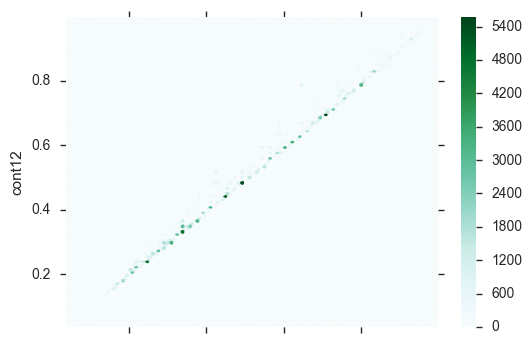

In [31]:
%matplotlib inline
print(train[['cont11','cont12']].corr())
train.plot.hexbin(x='cont11', y='cont12');

---
### 'cont1' and 'cont9' 
highly correlated as well at r=.93. There might be some outliers in cont9 where cont1 is 0, might be noise in the data to consider removing. Also appears to be some density clustering with the pair of data.

          cont1     cont9
cont1  1.000000  0.929912
cont9  0.929912  1.000000


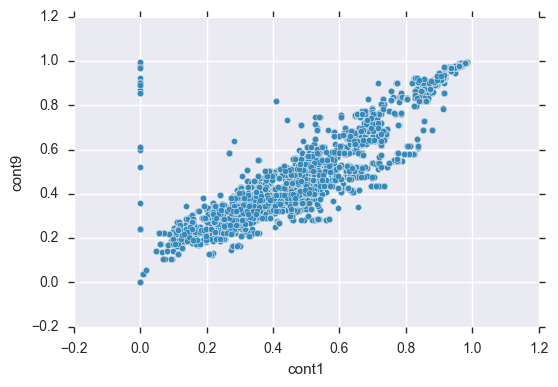

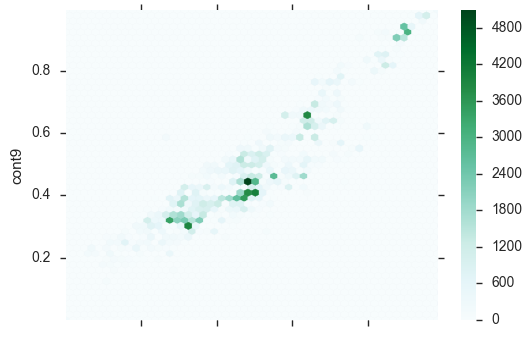

In [142]:
%matplotlib inline
print(train[['cont1','cont9']].corr())
train.plot.scatter(x='cont1', y='cont9');
train.plot.hexbin(x='cont1', y='cont9', gridsize=50);

## Intelligence for Data Prep

In [141]:
# Actions to pass to the data prepartion phase
import pickle
cont_names_to_drop =['cont12' # highly correlated to cont11
                     ,'cont9' # highly correlated to cont1
                    ]
pickle.dump(cont_names_to_drop, open( "../data/interim/cont_names_to_drop.p", "wb" ))

# Actions for data prep
tasks = dict({
        'Take natural log of target':"np.log(train['loss'])",
        'Create category to split cont13 into two':"train['cont13'] < .5"
    })
pickle.dump(tasks, open( "../data/interim/data_prep_tasks.p", "wb" ))
print(tasks)


{'Take natural log of target': "np.log(train['loss'])", 'Create category to split cont13 into two': "train['cont13'] < .5"}
